In [1]:
import pandas as pd 
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 

In [2]:
wine= pd.read_csv("C:\\Users\\sathya\\Documents\\datascience\\wine.csv")
#print(wine.describe())
wine.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
wine.info()
wine['Type'].dtype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


dtype('int64')

In [18]:
x = wine.drop(['Type'], axis=1)
x.head()

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [20]:
y=pd.DataFrame(wine['Type'],columns=['Type'])
y.head()

,Type
0,1
1,1
2,1
3,1
4,1


In [21]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
x = std.fit_transform(x)

In [32]:
from sklearn.decomposition import PCA
pca = PCA(random_state =40, n_components=13)
pca_com = pca.fit_transform(x)
pca_com.shape

(178, 13)

In [33]:
print(pca.singular_values_)

[28.94203422 21.08225141 16.04371561 12.78973645 12.32374195 10.68713954
  9.90368818  7.8760733   7.17081793  6.6828618   6.33958815  5.48097635
  4.28967045]


In [34]:
variance_ratio = pca.explained_variance_ratio_
print('explained_variance_ratio:')
print((variance_ratio)*100)

explained_variance_ratio:
[36.1988481  19.20749026 11.12363054  7.06903018  6.56329368  4.93582332
  4.23867932  2.68074895  2.2221534   1.93001909  1.73683569  1.29823258
  0.79521489]


In [36]:
cum_variance = np.cumsum(np.round(variance_ratio,decimals=4)*100)
cum_variance

array([ 36.2 ,  55.41,  66.53,  73.6 ,  80.16,  85.1 ,  89.34,  92.02,
        94.24,  96.17,  97.91,  99.21, 100.01])

In [47]:
# Converting into numpy array
Wine = wine.data.values
Wine

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [48]:
# Normalizing the numerical data 
wine_normal = scale(Wine)

In [49]:
# Considering only numerical data 
wine.data = wine.iloc[:,1:]
wine.data.head()


,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [45]:
# Creating Dataframe
df_PCA = pd.DataFrame(data = pca_com, columns =['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10','Pc11','pc12','pc13'])
df_PCA['Type'] = wine['Type']
df_PCA.tail(20)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Pc11,pc12,pc13,Type
158,-1.048182,-3.515090,1.160039,0.935329,-0.899449,3.284281,-0.642463,-0.522336,0.943267,0.351884,-0.281839,0.088263,-0.815180,3
159,-1.609912,-2.406638,0.548560,0.754310,-0.995207,2.919477,-0.711056,0.137528,0.189549,0.079947,-0.366763,0.085739,-0.812561,3
160,-3.143131,-0.738161,-0.090999,0.980648,-0.409814,0.398922,-0.074031,1.093190,-0.155798,-0.621055,0.467304,-0.113178,-0.318834,3
161,-2.240157,-1.175465,-0.101377,-1.165279,-0.264449,-0.801039,0.539883,-0.132604,0.555590,-0.246821,-0.222062,-0.102127,-0.438509,3
162,-2.847674,-0.556044,0.804215,-0.897888,-0.254801,-0.288568,0.867762,0.251984,0.318611,0.252622,0.006841,0.316639,-0.229248,3
163,-2.597497,-0.697966,-0.884940,-0.274229,0.772235,-0.719842,0.272500,0.260542,-0.339492,0.224802,-0.212659,-0.168802,0.057492,3
164,-2.949299,-1.555309,-0.983401,0.015480,-0.364082,0.491206,-0.985935,-0.785797,0.356328,0.007655,-0.073691,0.477745,0.101276,3
165,-3.530032,-0.882527,-0.466029,0.580790,-0.668960,-0.458814,0.522221,-1.075128,0.486439,0.034277,-0.006269,0.120475,0.081088,3
166,-2.406111,-2.592356,0.428226,-0.184335,0.447661,0.569506,0.035802,-0.673245,0.168007,-0.865855,-0.097445,0.799653,-0.090493,3
167,-2.929085,-1.274447,-1.213358,0.295316,-0.267350,0.381213,-0.644321,0.000553,-0.502531,-0.600024,0.075638,1.079656,-0.112991,3


In [46]:
wine['Type'].unique()
df_PCA.head(5)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Pc11,pc12,pc13,Type
0,3.316751,-1.443463,-0.165739,-0.215631,0.693043,-0.223880,0.596427,0.065139,0.641443,1.020956,-0.451563,0.540810,-0.066239,1
1,2.209465,0.333393,-2.026457,-0.291358,-0.257655,-0.927120,0.053776,1.024416,-0.308847,0.159701,-0.142657,0.388238,0.003637,1
2,2.516740,-1.031151,0.982819,0.724902,-0.251033,0.549276,0.424205,-0.344216,-1.177834,0.113361,-0.286673,0.000584,0.021717,1
3,3.757066,-2.756372,-0.176192,0.567983,-0.311842,0.114431,-0.383337,0.643593,0.052544,0.239413,0.759584,-0.242020,-0.369484,1
4,1.008908,-0.869831,2.026688,-0.409766,0.298458,-0.406520,0.444074,0.416700,0.326819,-0.078366,-0.525945,-0.216664,-0.079364,1


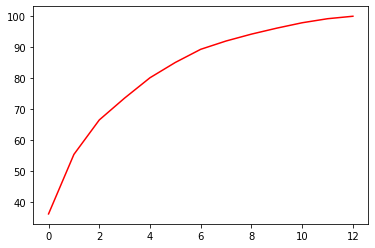

In [42]:
# Variance plot for PCA components obtained 
plt.plot(cum_variance,color="red")

In [17]:
finalDf = pd.concat([pd.DataFrame(pca_values[:,0:2],columns=['pc1','pc2']), wine[['Type']]], axis = 1)

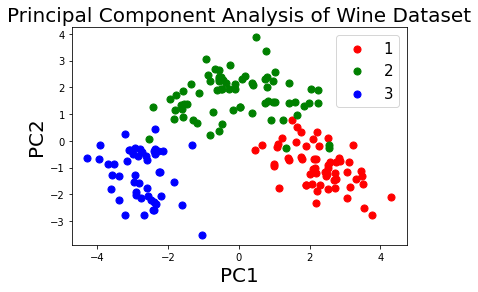

In [52]:
plt.xlabel('PC1',fontsize=20)
plt.ylabel('PC2',fontsize=20)
plt.title("Principal Component Analysis of Wine Dataset",fontsize=20)
targets = [1,2,3]
colors = ['r', 'g','b']
for target, color in zip(targets,colors):
    indicesToKeep = df_PCA['Type'] == target
    plt.scatter(df_PCA.loc[indicesToKeep, 'PC1']
               , df_PCA.loc[indicesToKeep, 'PC2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})
plt.show()

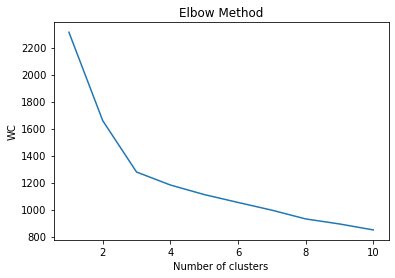

In [53]:
# Selecting 10 clusters from the above scree plot which is the optimum number of clusters 
from sklearn.cluster import KMeans

wc=[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(pca_com)
    wc.append(kmeans.inertia_)
plt.plot(range(1, 11), wc)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WC')
plt.show()

#model.labels_ # getting the labels of clusters assigned to each row 

In [56]:
n_clusters = [2,3,4,5,6]
for n_clusters in n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(pca_com)
    silhouette_avg = silhouette_score(pca_com, cluster_labels)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)

For n_clusters = 2 The average silhouette_score is : 0.25931695553182543
For n_clusters = 3 The average silhouette_score is : 0.2848589191898987
For n_clusters = 4 The average silhouette_score is : 0.25987462789190524
For n_clusters = 5 The average silhouette_score is : 0.19734439798042422
For n_clusters = 6 The average silhouette_score is : 0.13816940519863924


In [57]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(pca_com)
print(y_pred.shape)
y_pred

(178,)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [58]:
kmeans.cluster_centers_

array([[ 2.27619360e+00, -9.32054027e-01,  1.52803156e-03,
        -1.35498147e-01, -1.34912110e-01, -2.18283242e-01,
         5.21099249e-02,  2.49642497e-02, -5.02855192e-02,
         7.46793027e-02,  2.12907099e-02,  7.43830113e-03,
         5.06192498e-02],
       [-2.72003575e+00, -1.12565126e+00, -2.39093241e-01,
         6.24569372e-02,  7.36759999e-02,  9.99252193e-02,
        -6.03831729e-02, -7.38798948e-03,  2.00269270e-02,
        -6.14683784e-02, -8.11598488e-03, -3.45518279e-03,
        -5.05509102e-02],
       [-3.69566084e-02,  1.77223945e+00,  1.86138728e-01,
         8.02397126e-02,  7.08780744e-02,  1.29805766e-01,
        -2.32728507e-03, -1.80153234e-02,  3.22512140e-02,
        -2.30035303e-02, -1.39401351e-02, -4.38400536e-03,
        -8.61995490e-03]])

In [59]:
win =wine.copy()

In [61]:
win['Kmean']=y_pred
win.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Kmean
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


In [62]:
win['Kmean'].value_counts()

2    65
0    62
1    51
Name: Kmean, dtype: int64

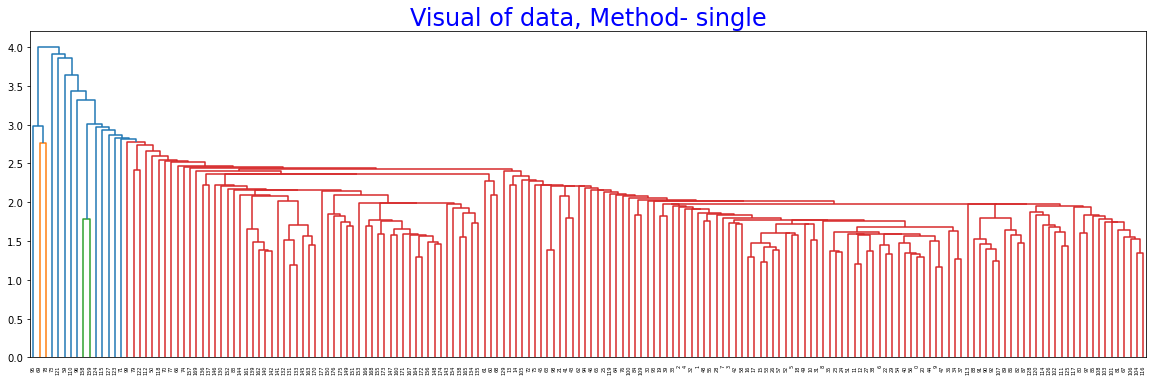

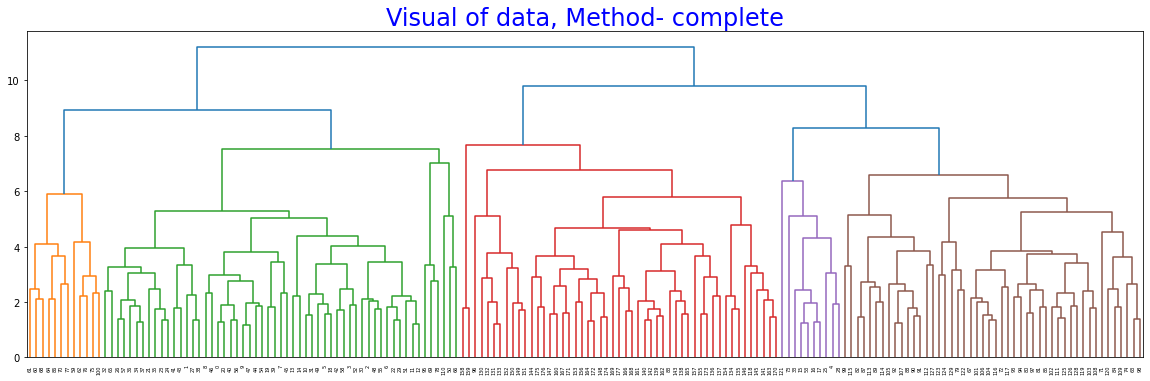

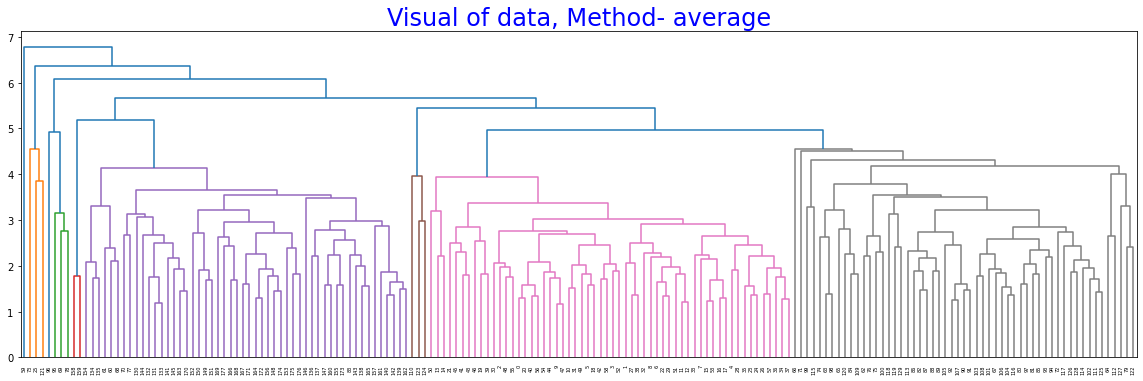

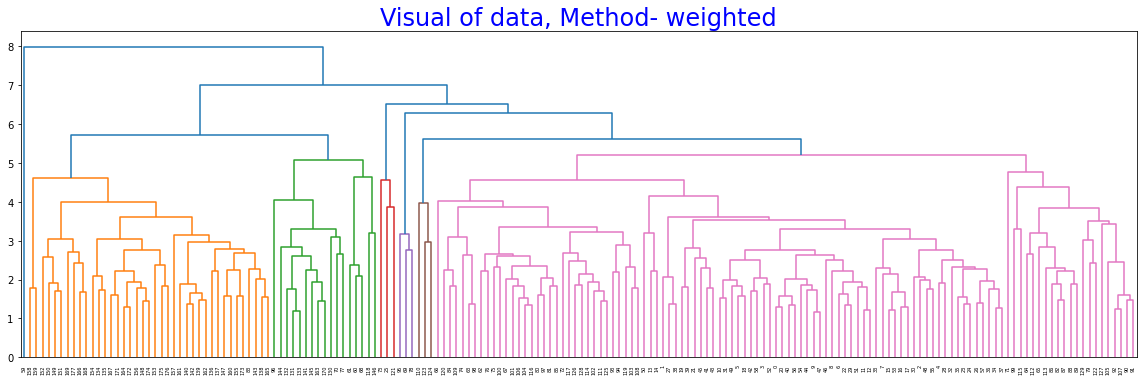

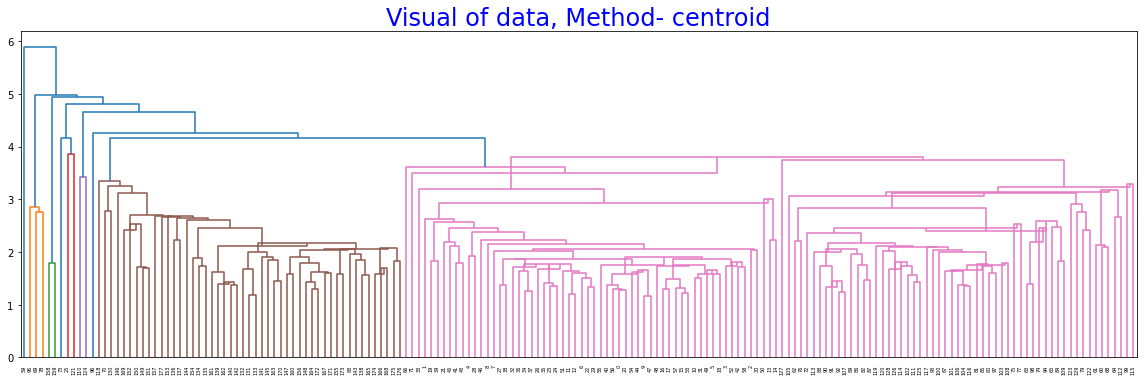

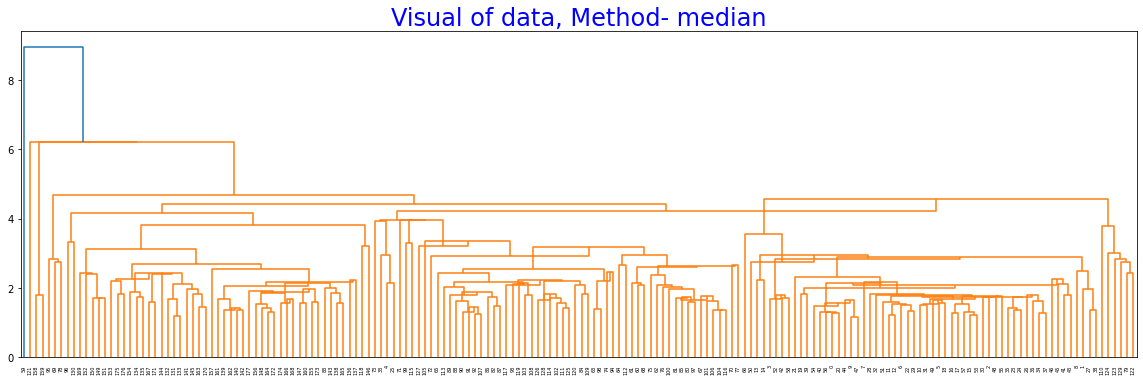

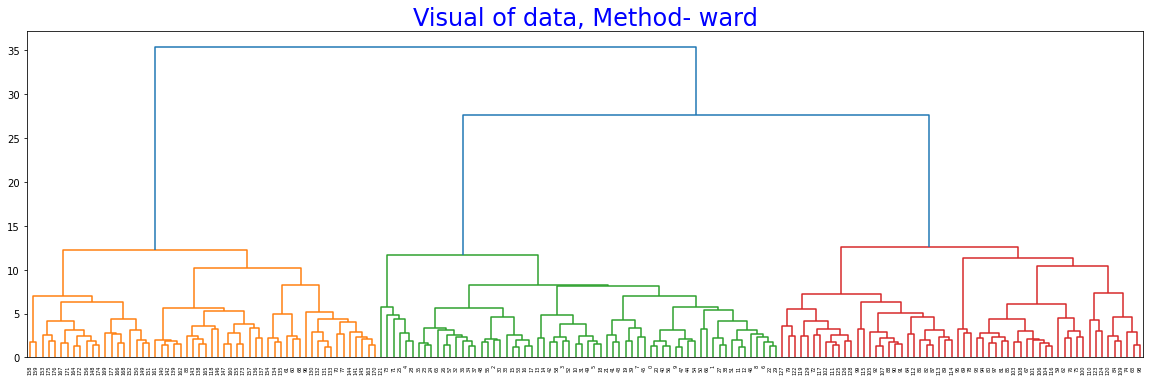

In [63]:
import scipy.cluster.hierarchy as shc
for methods in ['single','complete','average','weighted','centroid','median','ward']: 
    plt.figure(figsize =(20, 6)) 
    
    dict = {'fontsize':24,'fontweight' :16, 'color' : 'blue'}
    
    plt.title('Visual of data, Method- {}'.format(methods),fontdict = dict) 
    Dendrogram = shc.dendrogram(shc.linkage(pca_com, method = methods,optimal_ordering=False))

In [11]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_samples, silhouette_score

n_clusters = [2,3,4,5] 

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # bydefault it takes linkage 'ward'
        hie_labels = hie_cluster.fit_predict(wine)
        silhouette_avg2 = silhouette_score(wine, hie_labels)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_avg2)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.6587247821404869
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.641324775977862
For n_clusters = 2 The average silhouette_score with linkage- average : 0.6587247821404869
For n_clusters = 2 The average silhouette_score with linkage- single : 0.5393909657800712

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.5644632902637768
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.5418824272365056
For n_clusters = 3 The average silhouette_score with linkage- average : 0.610070428777538
For n_clusters = 3 The average silhouette_score with linkage- single : 0.48797853765911436

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.5606544994059134
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.5335853583768467
For n_clusters = 4 The average silhouette_score with linkage- average : 0.5296254648875364
For n_

In [ ]:
# hierarchical  clustering is the elaborate method of data  clustering we can't view the clusters for huge data.
# kmeans clustering  group the data by their types, 
# we go Principal Component analysis to reduce the dimension of the data, to obtain low dimensional data

#  i used PC13  to complete the cumalative variance as 100.01
